In [2]:
import pandas as pd
import math
import numpy as np

In [3]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U pandasql

Requirement already up-to-date: pandasql in c:\users\samee\miniconda3\miniconda12345\lib\site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: python-dateutil>=2.7.3 in c:\users\samee\miniconda3\miniconda12345\lib\site-packages (from pandas->pandasql) (2.8.1)



In [6]:
%load_ext sql

In [7]:
%sql postgresql://postgres:Harl3yZ3us1@@localhost/Mydatabase
conn = 'postgresql://postgres:Harl3yZ3us1@@localhost/Mydatabase'

In [8]:
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [9]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [11]:
df.shape

(550, 7)

# Book Rating

In [12]:
#Comparing number of fiction books, to non-fiction
popular_genres = pd.read_sql('SELECT Genre, COUNT(*) as Number_of_books FROM bestsellers GROUP BY 1',conn)
popular_genres['Percent_of_books'] = popular_genres.number_of_books.apply(lambda x: x/550)
print(popular_genres)

         genre  number_of_books  Percent_of_books
0      Fiction              240          0.436364
1  Non Fiction              310          0.563636


In [13]:
#Top 10 rated books with over 3000 reviews
order = df.groupby(['Name','Author','Genre'])[['User Rating','Reviews']].mean().reset_index()
order = order[order.Reviews > 3000]
order.sort_values('User Rating',ascending = False).head(10)

,Name,Author,Genre,User Rating,Reviews
177,Obama: An Intimate Portrait,Pete Souza,Non Fiction,4.9,3192.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
118,Harry Potter and the Goblet of Fire: The Illus...,J. K. Rowling,Fiction,4.9,7758.0
119,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,Fiction,4.9,3146.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
108,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,Fiction,4.9,7038.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9,5062.0
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0
312,The Wonderful Things You Will Be,Emily Winfield Martin,Fiction,4.9,8842.0


The Previous dataframe shows the top ten rated books, with at least 3000 reviews. However, we can see significant differences in the number of reviews, with some books having around 3000, and some books having over 10000. In this case it would be better option to take a weighted rating that takes into account the number of reviews.

In [14]:
# Weighted rating
m = min(df['Reviews'])
C = df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

#Adding weighted rating to our df, and doing another groupby
df['Weighted Rating'] = df.apply(weighted_rating, axis= 1)
df.head(10)
df['Rounded Weighted Rating'] = round(df['Weighted Rating'],5)
z = df.groupby(['Name','Author','Genre'])[['User Rating','Rounded Weighted Rating','Reviews']].mean().sort_values('Rounded Weighted Rating',ascending = False).head(10).reset_index()
z.head(10)


,Name,Author,Genre,User Rating,Rounded Weighted Rating,Reviews
0,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,4.89952,21834.0
1,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,4.89947,19546.0
2,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,4.89947,19576.0
3,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,4.89947,19622.0
4,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,4.89928,14344.0
5,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,4.89918,12619.0
6,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,4.89913,11881.0
7,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,4.89897,10052.0
8,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,4.89890,9413.0
9,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,4.89889,9382.0


Nine out of the top ten books seem to be Non Fiction, could be a sign of the fiction genres dominance in rated rankings

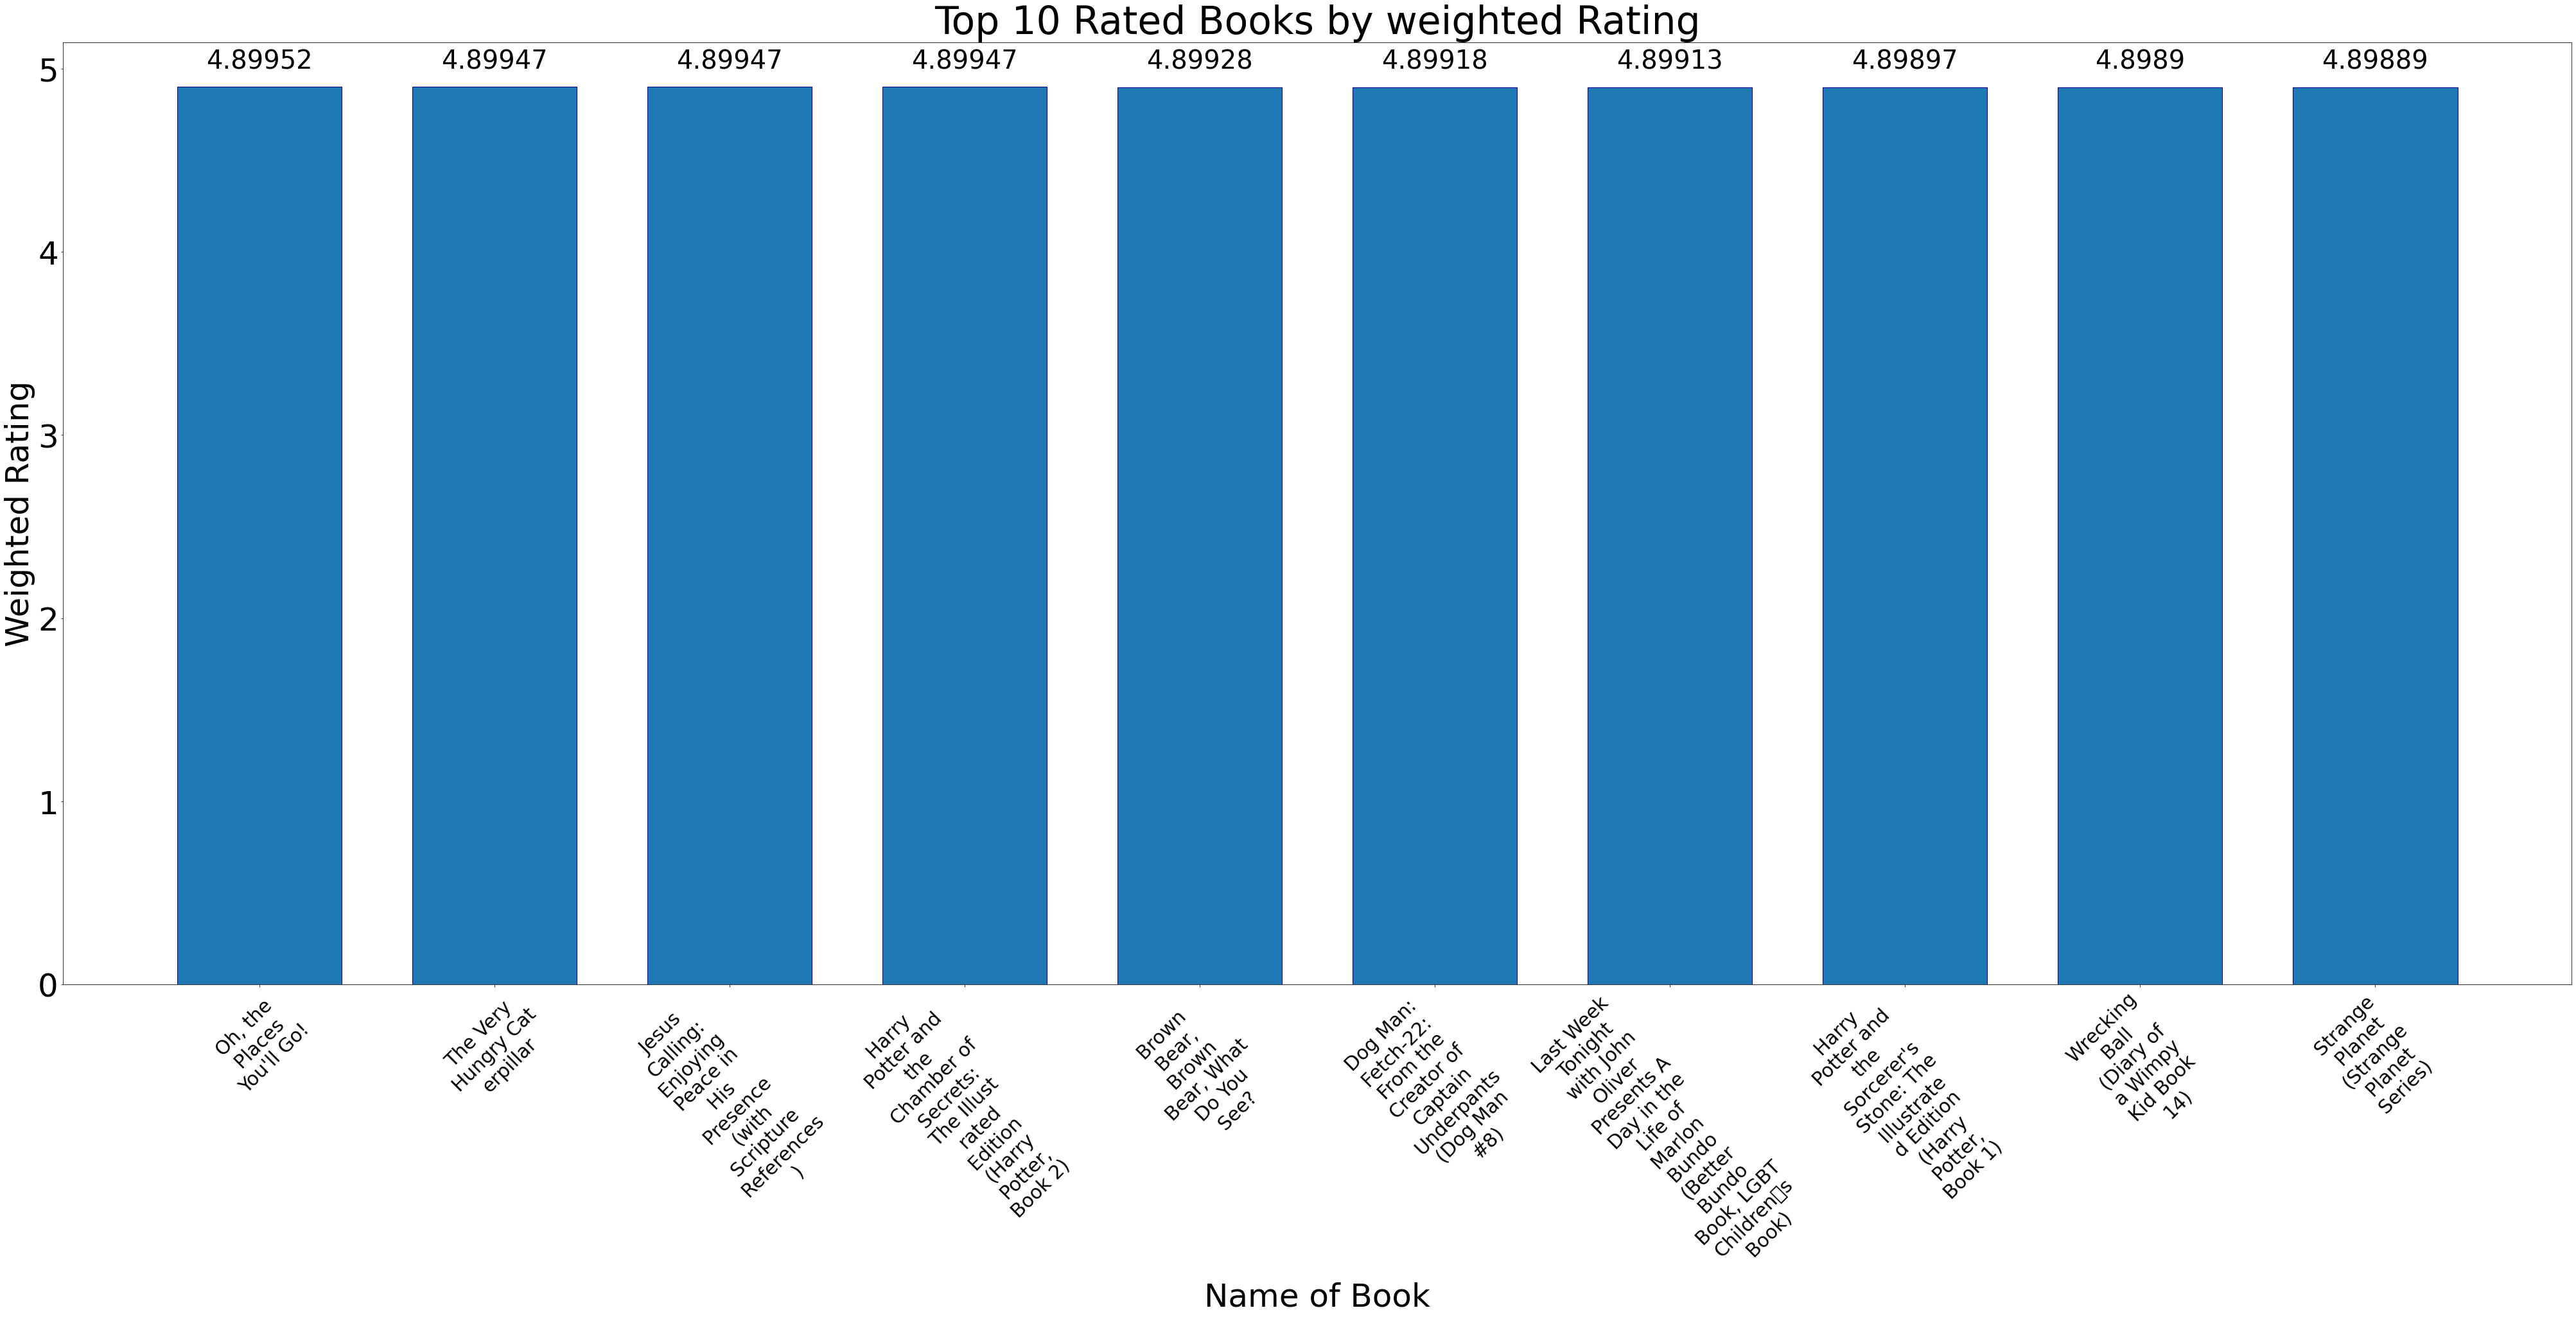

In [17]:
from matplotlib import pyplot as plt
import numpy as np
import textwrap

labels = z.Name.to_list()

#Plotting bar plot of the top 10 rated books by weighted rating

plt.figure(figsize = (70,27))
plt.bar(label,z['Rounded Weighted Rating'],edgecolor = 'darkblue',width = 0.7)
plt.xticks(label, [textwrap.fill(label, 10) for label in labels], rotation = 45, fontsize=30)
plt.yticks([0,1,2,3,4,5],fontsize = 50)
plt.ylabel('Weighted Rating',fontsize = 50)
plt.xlabel('Name of Book',fontsize = 50)
plt.title('Top 10 Rated Books by weighted Rating',fontsize = 60)

for a, b in enumerate(z['Rounded Weighted Rating']):
    plt.text(a,b+0.1, str(b),fontsize = 40, horizontalalignment='center')



Dr.Seuss's 'Oh, the Places You'll Go!' seems to come out on top for weighted ranking at 4.89952

                  Author  Rounded Weighted Rating
0             Eric Carle                 4.899470
1            Sarah Young                 4.899470
2        Bill Martin Jr.                 4.899280
3             Jill Twiss                 4.899130
4         Nathan W. Pyle                 4.898890
5  Emily Winfield Martin                 4.898830
6            Chip Gaines                 4.898680
7   Sherri Duskey Rinker                 4.898530
8             Dav Pilkey                 4.898441
9     Lin-Manuel Miranda                 4.898240


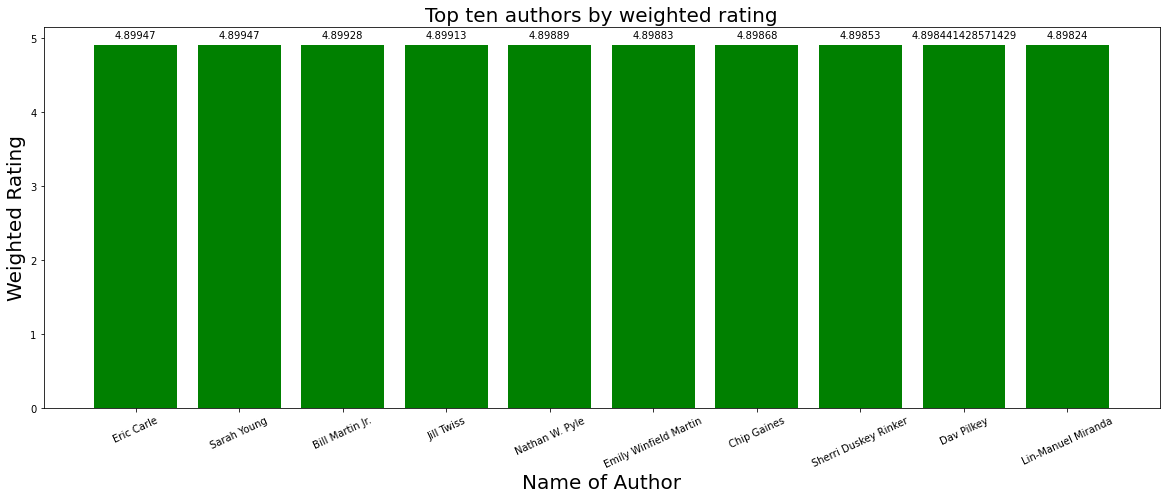

In [18]:
# Grouping authors by highest weighted rating
y = df.groupby('Author')['Rounded Weighted Rating'].mean().sort_values(ascending = False).head(10).reset_index()
print(y)

#Plotting top ten authors by weighted rating
plt.figure(figsize = (20,7))
plt.bar(y.Author,y['Rounded Weighted Rating'], color = 'green')
plt.xticks(y.Author,rotation = 25)
plt.title('Top ten authors by weighted rating',fontsize = 20)
plt.xlabel('Name of Author', fontsize = 20)
plt.ylabel('Weighted Rating', fontsize = 20)


for a, b in enumerate(y['Rounded Weighted Rating']):
    plt.text(a,b+0.1, str(b), horizontalalignment='center')



In [19]:
z = df.groupby('Genre')['Rounded Weighted Rating'].mean().reset_index()
print(z)

         Genre  Rounded Weighted Rating
0      Fiction                 4.648178
1  Non Fiction                 4.595981


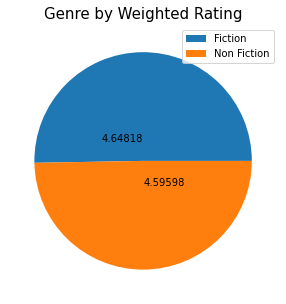

In [20]:
plt.figure(figsize = (10,5))
plt.pie(z['Rounded Weighted Rating'], labels = round(z['Rounded Weighted Rating'],5), labeldistance = 0.2)
plt.title('Genre by Weighted Rating',fontsize = 15)
plt.legend(z.Genre)


# Book Price

   index                                               Name  \
0     56  Diagnostic and Statistical Manual of Mental Di...   
1    307                       The Twilight Saga Collection   
2    112                           Hamilton: The Revolution   
3    228  The Book of Basketball: The NBA According to T...   
4    115         Harry Potter Paperback Box Set (Books 1-7)   
5    191  Publication Manual of the American Psychologic...   
6    333                                           Watchmen   
7    281                       The Official SAT Study Guide   
8    220                                      The Alchemist   
9    282  The Official SAT Study Guide, 2016 Edition (Of...   

                               Author        Genre  Price  
0    American Psychiatric Association  Non Fiction  105.0  
1                     Stephenie Meyer      Fiction   82.0  
2                  Lin-Manuel Miranda  Non Fiction   54.0  
3                        Bill Simmons  Non Fiction   53.0  
4     

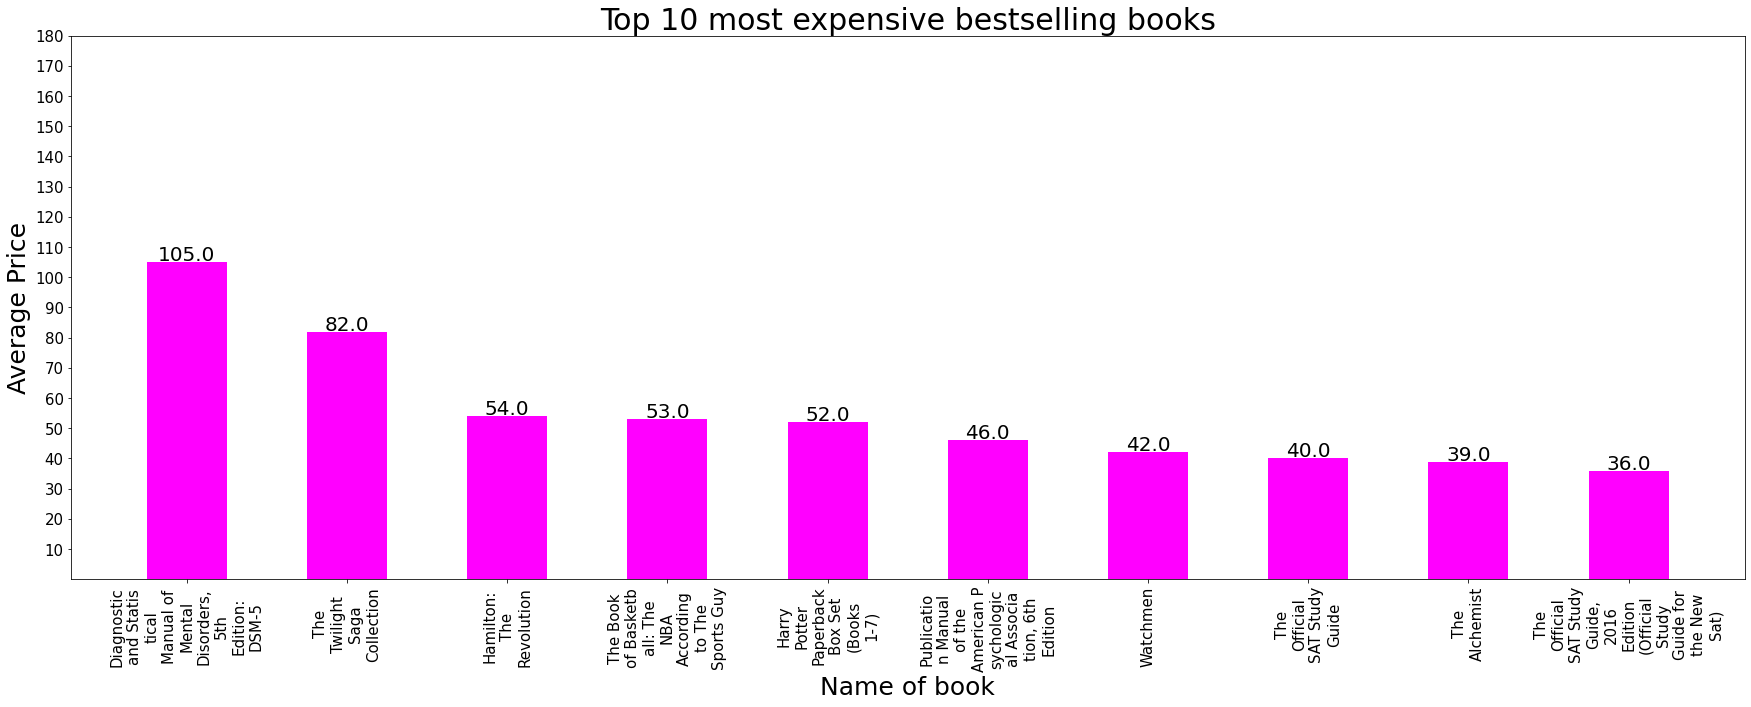

In [21]:
ten_highest_price = df.groupby(['Name','Author','Genre'],as_index = False)['Price'].mean().sort_values('Price',ascending = False).head(10).reset_index()
print(ten_highest_price)
labels = ten_highest_price.Name.to_list()




plt.figure(figsize = (30,10))
plt.title('Top 10 most expensive bestselling books', fontsize = 30)
plt.ylabel('Average Price',fontsize = 25)
plt.xlabel('Name of book',fontsize = 25)
plt.bar(ten_highest_price.Name,ten_highest_price.Price,width = 0.5,color = 'magenta')
plt.xticks(labels, [textwrap.fill(label, 10) for label in labels], rotation = 90, fontsize = 15)
plt.yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180],fontsize = 15)



for a, b in enumerate(ten_highest_price['Price']):
    plt.text(a,b+0.5,str(b),horizontalalignment='center', fontsize = 20)



The Diagnostic and Statistical Manual of Mental Disorders (5th edition), DSM-5, comes out on top as the most expensive bestselling book, as a relatively large publication that is useful in a number of medical professions

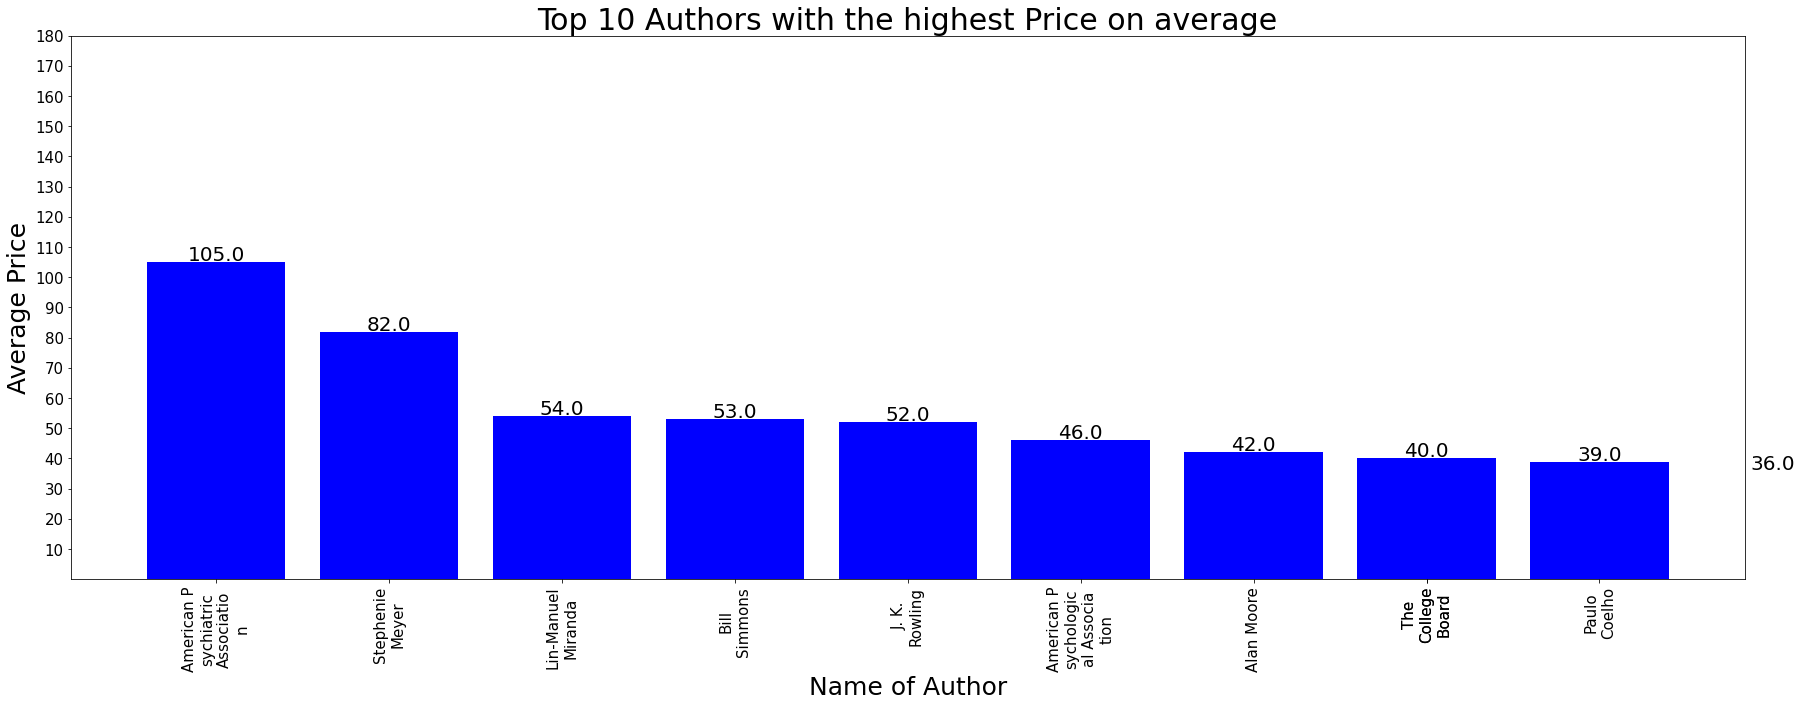

In [22]:
labels = ten_highest_price.Author.to_list()


plt.figure(figsize = (30,10))
plt.title('Top 10 Authors with the highest Price on average', fontsize = 30)
plt.ylabel('Average Price',fontsize = 25)
plt.xlabel('Name of Author',fontsize = 25)
plt.bar(ten_highest_price.Author,ten_highest_price.Price,color = 'blue')
plt.xticks(labels, [textwrap.fill(label, 10) for label in labels], rotation = 90, fontsize = 15)
plt.yticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180],fontsize = 15)



for a, b in enumerate(ten_highest_price['Price']):
    plt.text(a,b+0.5,str(b),horizontalalignment='center', fontsize = 20)

In [23]:
genre_price = df.groupby('Genre').Price.mean().reset_index()
print(genre_price)

         Genre      Price
0      Fiction  10.850000
1  Non Fiction  14.841935


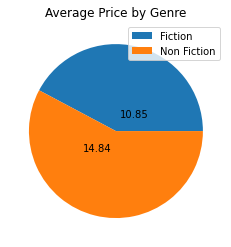

In [24]:
plt.pie(genre_price.Price, labels = round(genre_price.Price,2), labeldistance = 0.2)
plt.title('Average Price by Genre')
plt.legend(genre_price.Genre)

On average, non-fiction publications cost more than their fictional counterparts. Considering educational textbooks for all professions and fields, history texts and other instructional publications fall under non-fiction, there is a definite tendency for non-fiction books to cost more.

# Book Reviews

In [25]:
x = df.groupby(['Name','Author','Genre'])[['Weighted Rating','Reviews']].mean().sort_values('Reviews',ascending = False).head(10).reset_index()
print(x)

                                                Name          Author  \
0                            Where the Crawdads Sing     Delia Owens   
1                              The Girl on the Train   Paula Hawkins   
2                                           Becoming  Michelle Obama   
3                                          Gone Girl   Gillian Flynn   
4                             The Fault in Our Stars      John Green   
5                           The Nightingale: A Novel  Kristin Hannah   
6  Fifty Shades of Grey: Book One of the Fifty Sh...       E L James   
7                                        The Martian       Andy Weir   
8                        All the Light We Cannot See   Anthony Doerr   
9                                      The Alchemist    Paulo Coelho   

         Genre  Weighted Rating  Reviews  
0      Fiction         4.799924  87841.0  
1      Fiction         4.100241  79446.0  
2  Non Fiction         4.799890  61133.0  
3      Fiction         4.000399  57

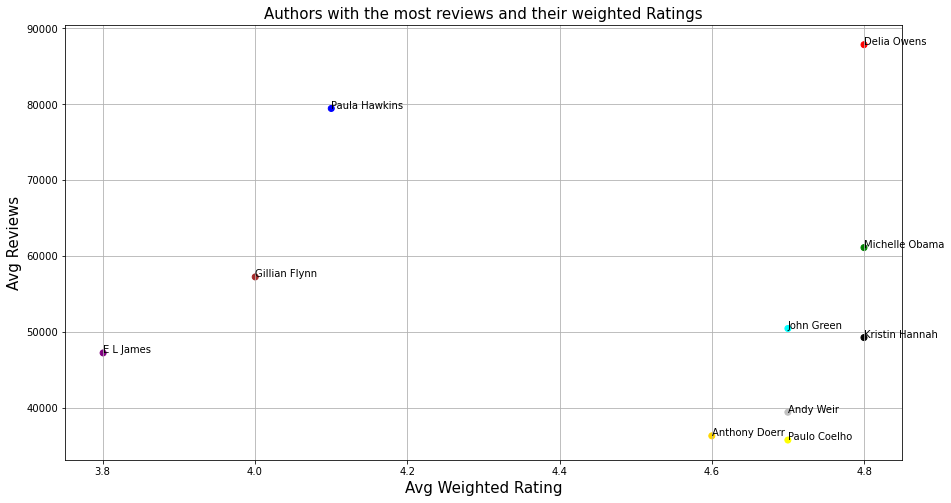

In [81]:
n = x.Author.to_list()
l = x['Weighted Rating'].to_list()
s = x.Reviews.to_list()



plt.figure(figsize = (15,8))
plt.grid()
plt.scatter(l,s, color = ['red','blue','green','brown','cyan','black','purple','silver','gold','yellow'])
plt.xlabel('Avg Weighted Rating', fontsize = 15)
plt.ylabel('Avg Reviews', fontsize = 15)
plt.title('Authors with the most reviews and their weighted Ratings', fontsize = 15)


for i, txt in enumerate(n):
    plt.annotate(txt, (l[i], s[i]), fontsize = 10)







Delia Owens' 'Where the Crawdads Sing' tops the ranking for average number of reviews, it was also rated highly with a weighted ranking of 4.8. 

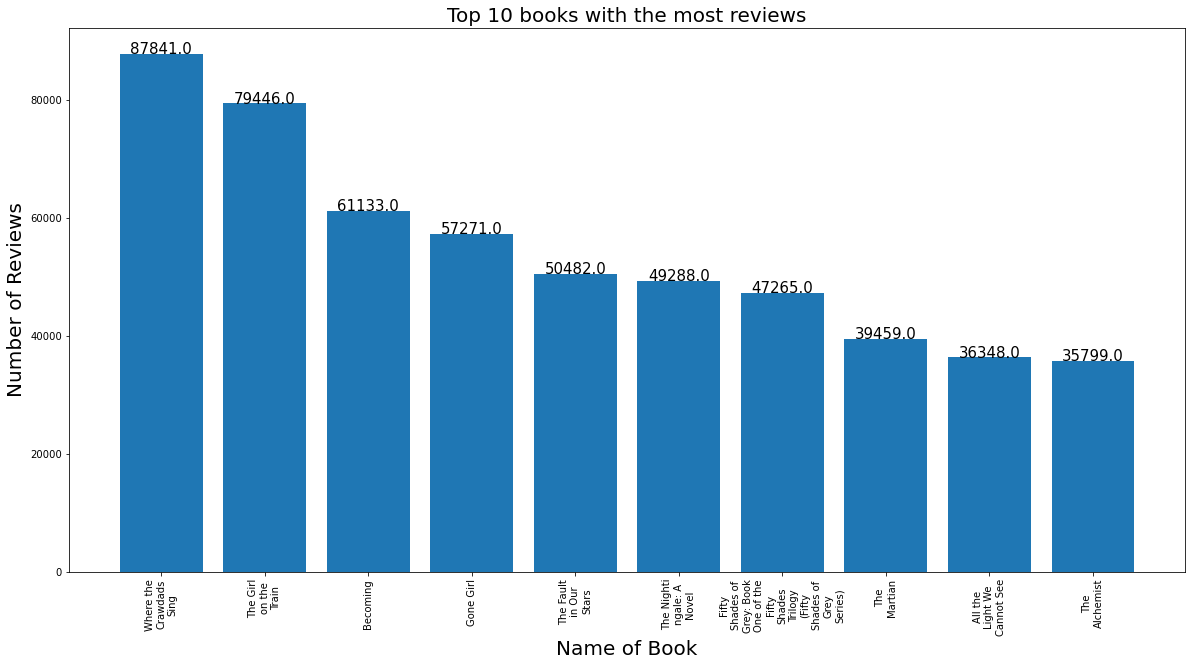

In [64]:
labels = x.Name.to_list()


plt.figure(figsize = (20,10))
plt.bar(x.Name,x.Reviews)
plt.title('Top 10 books with the most reviews', fontsize = 20)
plt.xlabel('Name of Book', fontsize = 20)
plt.ylabel('Number of Reviews', fontsize = 20)
plt.xticks(labels, [textwrap.fill(label, 10) for label in labels], rotation = 90, fontsize = 10)


for a, b in enumerate(x.Reviews):
    plt.text(a,b+0.5,str(b),horizontalalignment='center', fontsize = 15)

In [85]:
reviews_by_genre = df.groupby('Genre').Reviews.mean().reset_index()
reviews_by_genre

,Genre,Reviews
0,Fiction,15683.791667
1,Non Fiction,9065.145161


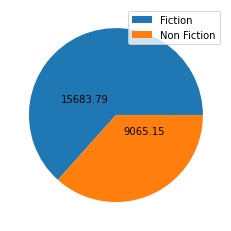

In [91]:
plt.pie(reviews_by_genre.Reviews, labels = round(reviews_by_genre.Reviews,2), labeldistance = 0.2)
plt.legend(reviews_by_genre.Genre)

On average, fiction books accumulate more reviews than their non-fiction counterparts, with a relatively large gap between the two genres, the review culture of the fiction community is dominant

# Trends Over The Years

In [101]:
df.head(10)
by_year = df.groupby(['Year','Genre'])[['Reviews','Price','Weighted Rating']].mean().reset_index()
print(by_year)


    Year        Genre       Reviews      Price  Weighted Rating
0   2009      Fiction   6534.333333  15.583333         4.592040
1   2009  Non Fiction   3026.230769  15.230769         4.578171
2   2010      Fiction   8409.250000   9.700000         4.615156
3   2010  Non Fiction   3526.533333  16.000000         4.523666
4   2011      Fiction  10335.285714  11.619048         4.619318
5   2011  Non Fiction   6482.758621  17.620690         4.515648
6   2012      Fiction  19896.238095  12.285714         4.495334
7   2012  Non Fiction   8162.931034  17.482759         4.559306
8   2013      Fiction  19986.833333  10.708333         4.545843
9   2013  Non Fiction   6739.346154  18.192308         4.562160
10  2014      Fiction  19382.862069  10.172414         4.630769
11  2014  Non Fiction  10994.952381  20.809524         4.610177
12  2015      Fiction  23706.117647   9.352941         4.652683
13  2015  Non Fiction   9353.484848  10.969697         4.645400
14  2016      Fiction  19563.263158  12.

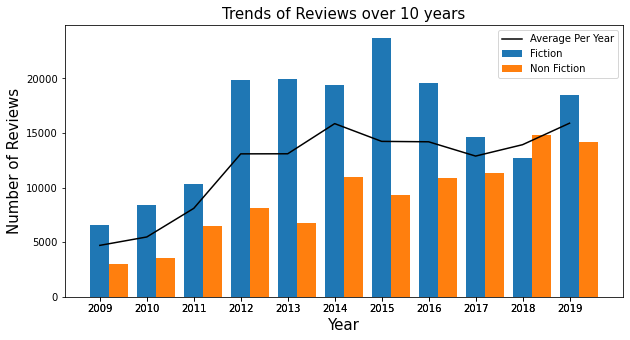

In [180]:
zy = df.groupby('Year').Reviews.mean().reset_index()
leg = ['Average Per Year','Fiction','Non Fiction']

w = 0.4



plt.figure(figsize = (10,5))
plt.bar(by_year.Year.unique(),by_year.Reviews[by_year.Genre == 'Fiction'],width = w)
plt.bar(by_year.Year.unique()+w,by_year.Reviews[by_year.Genre == 'Non Fiction'],width = w)




plt.xticks(by_year.Year)
plt.xlabel('Year',fontsize = 15)
plt.title('Trends of Reviews over 10 years', fontsize = 15)
plt.ylabel('Number of Reviews', fontsize = 15)



plt.plot(zy.Year,zy.Reviews, color = 'black')

plt.legend(leg)








The number of book reviews on Amazon bestsellers trended upwards on average with notable dips in 2013 and 2017. Fiction publications were dominant in reviews for every year except 2018.

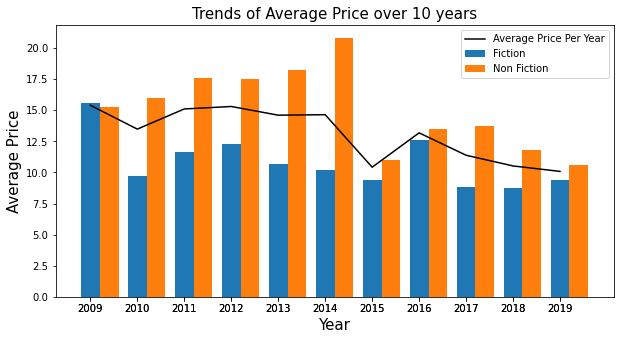

In [182]:
zy = df.groupby('Year').Price.mean().reset_index()
leg = ['Average Price Per Year','Fiction','Non Fiction']

w = 0.4



plt.figure(figsize = (10,5))
plt.bar(by_year.Year.unique(),by_year.Price[by_year.Genre == 'Fiction'],width = w)
plt.bar(by_year.Year.unique()+w,by_year.Price[by_year.Genre == 'Non Fiction'],width = w)




plt.xticks(by_year.Year)
plt.xlabel('Year',fontsize = 15)
plt.title('Trends of Average Price over 10 years', fontsize = 15)
plt.ylabel('Average Price', fontsize = 15)



plt.plot(zy.Year,zy.Price, color = 'black')

plt.legend(leg)

The average price of books on the Amazon bestselling list has been trending downwards over the years with a sharp change from 2014 to 2015. Non-fiction books were price higher on average from 2010 downwards, with 2009 being the sole year where fiction books are more expensive on average.

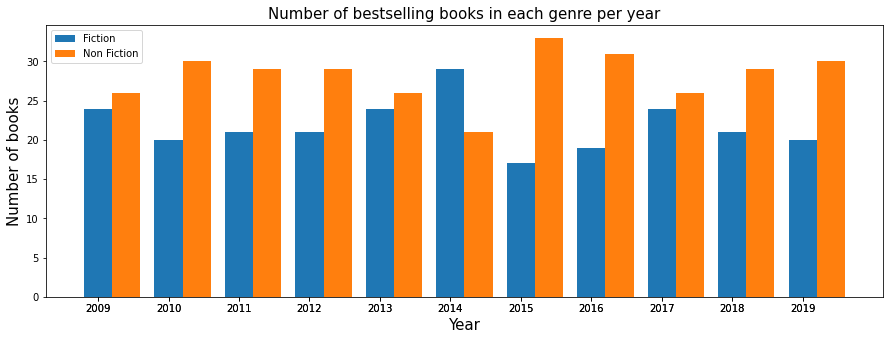

In [203]:

zy = df.groupby(['Year','Genre']).Name.count().reset_index()
width = 0.4
leg = ['Fiction','Non Fiction']

plt.figure(figsize = (15,5))
plt.bar(zy.Year.unique(),zy.Name[zy.Genre == 'Fiction'], width = width)
plt.bar(zy.Year.unique()+width,zy.Name[zy.Genre == 'Non Fiction'], width = width)




plt.xticks(by_year.Year)
plt.xlabel('Year',fontsize = 15)
plt.title('Number of bestselling books in each genre per year', fontsize = 15)
plt.ylabel('Number of books', fontsize = 15)





plt.legend(leg)



# Conclusion

There were more non-fiction books on the bestselling list over the years and these non-fiction books were more expensive than their counterparts on average. However, fiction books are reviewed more and rated higher on average.